# <font color='DarkSlateBlue'>Intro Data Analysis</font> 

## <font color='NavyBlue'>Titanic Data</font>

### <font color='DarkSlateBlue'> Eu, mulher, 33 anos na 2º classe sobreviveria?</font>

![alt text](titanic2.jpg "titanic")

In [1]:
#importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np


In [2]:
#Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import datasets, svm, model_selection, tree, preprocessing, metrics

In [3]:
filename = 'C:/Nanodegree/Intro_Data_Analys/titanic_data.csv'
titanic_df = pd.read_csv(filename, header=0)

In [ ]:
titanic_df.head()

## Data Wrangler
Pontos focais:
- Idade
- Sexo
- Acompanhantes: SibSp + Parch
- Classe

Descrição dos campos:
- Embarked: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
- Parch: Número de pais e filhos a bordo
- Pclass: Classe que o passageiro embarcou (1 = 1º classe; 2 = 2º classe; 3 = 3º classe)
- Sex: Gênero feminino (female) ou male (masculino)
- Sibsp: Numero de irmãos e esposa a bordo
- Survived: 0 - Não sobreviveu e 1 = sobreviveu

In [4]:
#Conferindo o tipo dos dados criados
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#SibSp e Parch tem a mesma raiz de informação (total de acompanhantes), para facilitar a análise, será criada 
#uma nova coluna com o total de acompanhantes
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']

In [6]:
#influencia de Age, Fare e Family na sobrevivência
titanic_df.groupby(['Pclass', 'Sex', 'Survived']).mean()

PassengerId        Age     SibSp     Parch  \
Pclass Sex    Survived                                               
1      female 0          325.000000  25.666667  0.666667  1.333333   
              1          473.967033  34.939024  0.549451  0.428571   
       male   0          413.623377  44.581967  0.272727  0.259740   
              1          527.777778  36.248000  0.377778  0.311111   
2      female 0          423.500000  36.000000  0.500000  0.166667   
              1          444.785714  28.080882  0.485714  0.642857   
       male   0          454.010989  33.369048  0.307692  0.142857   
              1          415.588235  16.022000  0.529412  0.647059   
3      female 0          440.375000  23.818182  1.291667  1.097222   
              1          359.083333  19.329787  0.500000  0.500000   
       male   0          456.750000  27.255814  0.523333  0.213333   
              1          447.638298  22.274211  0.340426  0.297872   

                              Fare    Family  
Pclass Sex    Survived                        
1      female 0         110.604167  2.000000  
              1         105.978159  0.978022  
       male   0          62.894910  0.532468  
              1          74.637320  0.688889  
2      female 0          18.250000  0.666667  
              1          22.288989  1.128571  
       male   0          19.488965  0.450549  
              1          21.095100  1.176471  
3      female 0          19.773093  2.388889  
              1          12.464526  1.000000  
       male   0          12.204469  0.736667  
              1          15.579696  0.638298

Como a coluna Sex está em formato texto o valor retornado não é significativo, portanto vou atribuir valor de 0 -female e 1 - Male

In [7]:
#Uma vez que o total de SEX é igual ao total de registros, posso testar o conteúdo de todos os valores
titanic_df['Sex_temp'] = titanic_df.Sex == "male"

#Transformando o False em 0 e o True em 1
titanic_df['Sex'] = titanic_df['Sex_temp'].as_matrix().astype(np.int)
#Apaga a coluna temporaria sex
titanic_df.drop('Sex_temp', axis=1, inplace=True)

#uma outra possibilidade:
#pd.get_dummies(titanic_df, columns='Sex'), drop_first=True)

Age tem valores nulos que serão substituidos pela idade média geral da coluna Age.

In [8]:
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

### Excluíndo colunas 
Colunas que não serão consideradas na análise: 
1. O conteúdo de SibSp e Parch estão armazenado na nova coluna Family
2. PassengerId, Ticket e Embarked não tem conteúdo significativo no contexto selecionado
3. O dado da coluna Cabin pode ser trabalhado, por exemplo, se for considerado a primeira letra do conteúdo, mas como faltam muitos valores, e não encontrei um forte vinculo dessa variável no resultado procurado, optei por excluí-la. 77.10% de nulos


In [9]:

#Confirmando o % de nulos na coluna Cabin em relação ao total de registros
perc_null_cabin = (float(sum(titanic_df['Cabin'].isnull()))/float(titanic_df['PassengerId'].count()))*100

#Apagando as colunas
titanic_df.drop(['PassengerId','SibSp', 'Parch', 'Cabin','Embarked', 'Ticket','Name'], axis=1, inplace=True)

titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family
0,1,0,3,1,22.0,7.2500,1
1,2,1,1,0,38.0,71.2833,1
2,3,1,3,0,26.0,7.9250,0
3,4,1,1,0,35.0,53.1000,1
4,5,0,3,1,35.0,8.0500,0


### Sumário estatístico
Aplicada aos valores númericos

- count: Total de elementos não nulos
- mean: Média
- std: Desvio Padrão
- min: Maior valor da amostra
- max: Menor valor da amostra
- 25%: Quartil 1, corresponde a 25% da amostra
- 50%: Quartil 2 ou mediana da amostra
- 75%: Quartil 3, corresponde a % da amostra

In [11]:
titanic_df.describe().fillna(0)

,Survived,Pclass,Sex,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,0.904602
std,0.486592,0.836071,0.477990,13.002015,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,29.699118,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,10.000000


### Correlação de Pearson
Qual a corelação das variáveis como fator sobrevivência? O método pearson (.corr) foi utilizado para demonstrar a 
dependencia entre elas. O valor pode variar entre 0 e 1, tanto negativo quanto positivo.
Espera-se um grau de correlação superior a 0.5 para demonstrar uma correlação de moderada a muito forte.
    

In [12]:
titanic_df.corr(method='pearson', min_periods=1)

,Survived,Pclass,Sex,Age,Fare,Family
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.257307,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.331339,-0.549500,0.065997
Sex,-0.543351,0.131900,1.000000,0.084153,-0.182333,-0.200988
Age,-0.069809,-0.331339,0.084153,1.000000,0.091566,-0.248512
Fare,0.257307,-0.549500,-0.182333,0.091566,1.000000,0.217138
Family,0.016639,0.065997,-0.200988,-0.248512,0.217138,1.000000


Entre os valores demonstrados, Sex e Age são as variáveis mais correlacionadas com Survived.

# Visualizando os dados

### Age

In [ ]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot(2,2,1)
titanic_df.Age.hist(bins=10)
plt.xlabel("Age")
plt.title("Histrogram Age, (bin=10)")    

ax2 = plt.subplot(2,2,2)
titanic_df['Age'].plot(kind='kde', style='k--')
# sets the y axis lable
plt.ylabel("Density")
plt.xlabel("Age")
plt.title("Density - Age")

ax3 = plt.subplot(2,2,(3,4))
# plots a kernel density estimate of the subset of the 1st class passangers's age
titanic_df.Age[titanic_df.Pclass == 1].plot(kind='kde')    
titanic_df.Age[titanic_df.Pclass == 2].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Distribuicao Age/Class")
# sets our legend for our graph.
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

In [ ]:
survived_yes = titanic_df[titanic_df['Survived']==1]
survived_no = titanic_df[titanic_df['Survived']==0]
grouped_yes = survived_yes.groupby(['Pclass','Sex']).mean()['Age']
grouped_yes.unstack()

In [ ]:
#Agrupando os dados para descobrir se uma mulher de 32 anos está na faixa média dos sobreviventes

In [ ]:
# specifies the parameters of our graphs
survived_yes = titanic_df[titanic_df['Survived']==1]
survived_no = titanic_df[titanic_df['Survived']==0]
grouped_yes = survived_yes.groupby(['Pclass','Sex']).mean()['Age'].unstack()

# lets us plot many diffrent shaped graphs together 
grouped_yes.plot(kind='bar')
plt.xlabel("Classe")
plt.ylabel('Idade')
plt.title("Idade media dos sobreviventes")   
plt.legend(('Mulheres', 'Homens'),loc='best') 

## Questões a serem respondidas
- Estar acompanhado diminuiu a chance de sobreviver? 
- A classe, dependendo talvez por sua localização, teve relação com a chance de sobreviver?

In [ ]:
# Set the seed
np.random.seed(12)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=1000, # Number of trees
                                  max_features=2,    # Num features considered
                                  oob_score=True)    # Use OOB scoring*

features = ["Sex","Pclass","Family","Age"]

# Train the model
rf_model.fit(X=titanic_df[features],
             y=titanic_df["Survived"])

#Acuracia desse modelo de dados
print("OOB accuracy: ")
print(rf_model.oob_score_)

In [ ]:
X_train = combined_data.drop(combined_data[[5]],axis=1)[0:len(train_data)]
Y_train = combined_data["Survived"][0:len(train_data)]
X_test  = combined_data.drop(combined_data[[5]],axis=1)[len(train_data):-1]

#Prediction with Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

fimp = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
ind = np.argsort(fimp)[::-1] #indices sorted by importance

# Let's print the importance of each feature in prediction
print("Ranking of features for prediction:")

for i in range(X_train.shape[1]):
    print("%d. %d %s (%f)" % (i + 1, ind[i], X_train.columns.values[ind[i]], fimp[ind[i]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Ranking of Features")
plt.bar(range(X_train.shape[1]), fimp[ind],yerr=std[ind], align="center")
plt.xticks(range(X_train.shape[1]), ind)
plt.xlim([-1, X_train.shape[1]])
plt.show()


#It looks like feature Solo was not so useful for prediction. Let's try predicting
#excluding these and see if it improves the performance
X_train = combined_data.drop(combined_data[[5,9]],axis=1)[0:len(train_data)]
Y_train = combined_data["Survived"][0:len(train_data)]
X_test  = combined_data.drop(combined_data[[5,9]],axis=1)[len(train_data)::]

#Prediction with Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

#let's write our prediction into a file
results = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })


In [ ]:
titanic_df.head()

In [13]:
processed_df = titanic_df.copy()
#X recebe todos os valores do dataset menos a coluna Survived que será usada na comparação y
X = processed_df.drop(['Survived'], axis=1).values
#y recebe os valores da coluna Survived
y = processed_df['Survived'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [14]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.83798882681564246

In [15]:
#Prediction with Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)


0.9831460674157303

In [25]:
processed_df.columns


Index([u'Survived', u'Pclass', u'Sex', u'Age', u'Fare', u'Family'], dtype='object')

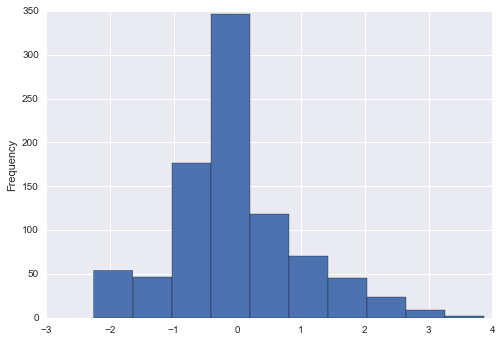

In [34]:
#normalizando a idade. Qual o std de 32 anos?
def std_feature(df):
    return (df - df.mean()) / df.std(ddof=0)

titanic_std = titanic_df.apply(std_feature)
titanic_std.Age.plot.hist(bins=10)

In [19]:
#De acordo com o modelo utilizado, ranking de contribuição das colunas no resultado 
#['0 - PassengerId', '1 - Pclass', '2 - Sex', '3 - Age', '4 - Fare', '5 - Family']
'0:Pclass; 1:Sex ; 2:Age; 3:Fare; 4:Family'
importances = random_forest.feature_importances_
indices = np.argsort(random_forest.feature_importances_)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 3 (0.286818)
2. feature 2 (0.277851)
3. feature 1 (0.262889)
4. feature 0 (0.092608)
5. feature 4 (0.079835)
